# Hello MNIST

The MNIST dataset, "Modified National Institute of Standards and Technology", is pretty much the first thing any computer vision algorithm sees, as its become the industry standard benchmark. It has a training set of 60,000 examples and a test set of 10,000 examples of handwritten digits, cleaned and deskewed. Therefore, we don't need to do any preprocessing on it. 

The current record for the MNIST is held by a deep convolutional neural network. 

But we aren't doing neural networks today, so lets try something simple, like K Nearest Neighbors. 

In [1]:
# Get used to importing these
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from PIL import Image


## Importing the data

Because we don't have all day, we'll only be training with the 10,000 of the examples, but this should still give a good idea about how we do things around here. 

The file is in CSV format, so we use pandas's read_csv to read it into a Pandas dataframe. We create two pandas series, one with the label and one with its corresponding image. 

In [2]:
# It might take a few seconds to load in
data = pd.read_csv(r"C:\Users\mark_\OneDrive\Documents\MACHINELANR\MNIST.csv")
labels = data["label"]
images = data.drop(labels = ["label"],axis = 1)

# please ignore the line below
s,images,a,labels = train_test_split(images,labels,test_size = 0.23809,random_state = 69)

## A quick look at some numbers

Well, we're working with image data, and printing out the image to the console is not exactly effective. It's much more meaningful to plot it out with Matplotlib.

In [1]:
image_no = 233

image = (np.array(images.iloc[image_no]).reshape(28,28))
print(labels.iloc[image_no])
plt.imshow(image)
plt.show()

NameError: name 'np' is not defined

## Plotting the distributions


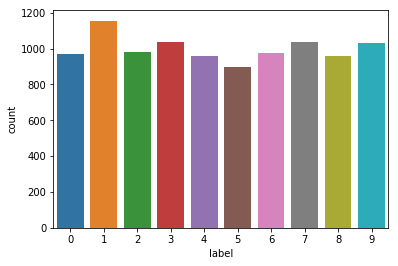

In [4]:
sns.countplot(labels)

## OK let's make this model!

It's actually way easier than it sounds, as Scikit learn already does all the hard work for you

In [5]:
X_train,X_test,y_train,y_test = train_test_split(images,labels,test_size = 0.1,random_state = 49)

neigh = KNeighborsClassifier(n_neighbors = 10)
print(images.shape)
neigh.fit(X_train,y_train)
print(neigh.score(X_test,y_test))

(10000, 784)
0.942


## Can we test it on one of your own pictures?

[1]
[[0.  0.8 0.  0.  0.2 0.  0.  0.  0.  0. ]]


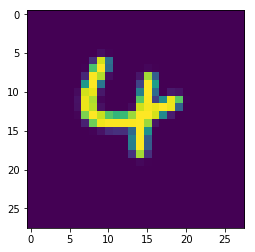

In [12]:
img = Image.open(r"C:\Users\mark_\OneDrive\Documents\MACHINELANR\four2.png")
img = img.resize((28,28),Image.ANTIALIAS)
imgarray = (255-np.array(img))
plt.imshow(imgarray)
imgarray = pd.DataFrame(pd.Series(np.hstack(imgarray))).transpose()
print(neigh.predict(imgarray))
print(neigh.predict_proba(imgarray))
